<a href="https://colab.research.google.com/github/NosenkoArtem/Neural_Networks_and_CV/blob/master/module05_mnist_conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://engmrk.com/wp-content/uploads/2018/09/LeNet_Original_Image.jpg)

![alt text](https://engmrk.com/wp-content/uploads/2018/09/LeNEt_Summary_Table.jpg)

In [0]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [0]:
import torchvision.datasets

In [0]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)


In [4]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [5]:
len(y_train), len(y_test)

(60000, 10000)

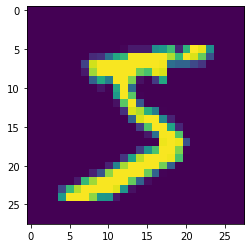

tensor(5)


In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [0]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [8]:
X_train.shape

torch.Size([60000, 1, 28, 28])

In [0]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.ReLU()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
       
        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.ReLU()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.ReLU()
        
        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.ReLU()
        
        self.fc3   = torch.nn.Linear(84, 10)
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x
    
lenet5 = LeNet5()

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)

In [0]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(lenet5.parameters(), lr=5.0e-3, momentum=0.7)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=1.0e-3, max_lr=0.1, mode='exp_range')

In [12]:
batch_size = 800

train_accuracy_history = []
train_loss_history = []

test_accuracy_history = []
test_loss_history = []

X_train = X_train.to(device)
y_train = y_train.to(device)

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(160):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = lenet5.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()
        scheduler.step()

    train_preds = lenet5.forward(X_train)
    train_loss_history.append(loss(train_preds, y_train).data.cpu())

    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())
    
    accuracy = (train_preds.argmax(dim=1) == y_train).float().mean().data.cpu()
    train_accuracy_history.append(accuracy)

    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)
    
    print(accuracy)

tensor(0.9386)
tensor(0.9679)
tensor(0.9745)
tensor(0.9799)
tensor(0.9817)
tensor(0.9828)
tensor(0.9851)
tensor(0.9882)
tensor(0.9890)
tensor(0.9844)
tensor(0.9875)
tensor(0.9893)
tensor(0.9900)
tensor(0.9855)
tensor(0.9884)
tensor(0.9892)
tensor(0.9871)
tensor(0.9903)
tensor(0.9858)
tensor(0.9886)
tensor(0.9890)
tensor(0.9870)
tensor(0.9854)
tensor(0.9888)
tensor(0.9897)
tensor(0.9900)
tensor(0.9883)
tensor(0.9863)
tensor(0.9903)
tensor(0.9905)
tensor(0.9892)
tensor(0.9901)
tensor(0.9901)
tensor(0.9920)
tensor(0.9913)
tensor(0.9921)
tensor(0.9924)
tensor(0.9922)
tensor(0.9921)
tensor(0.9920)
tensor(0.9922)
tensor(0.9919)
tensor(0.9919)
tensor(0.9921)
tensor(0.9923)
tensor(0.9923)
tensor(0.9923)
tensor(0.9923)
tensor(0.9923)
tensor(0.9923)
tensor(0.9923)
tensor(0.9923)
tensor(0.9923)
tensor(0.9923)
tensor(0.9923)
tensor(0.9923)
tensor(0.9923)
tensor(0.9921)
tensor(0.9921)
tensor(0.9921)
tensor(0.9921)
tensor(0.9921)
tensor(0.9921)
tensor(0.9921)
tensor(0.9921)
tensor(0.9921)
tensor(0.9

In [13]:
lenet5.forward(X_test)

tensor([[-12.3365,  14.1980,  -7.5757,  ...,  66.7297, -12.3091,   9.1230],
        [ -0.7426,   3.5881,  51.4069,  ...,   3.4043,  -5.1096, -19.6196],
        [-13.6881,  36.4282, -11.4800,  ...,  -2.1898,   2.7493,  -4.1782],
        ...,
        [-22.5051,   9.7310, -16.7459,  ..., -10.5712,  17.2566,   7.2256],
        [  3.2114, -11.7596, -24.9395,  ..., -18.8247,  30.5954,   4.2268],
        [ -5.7444,  -6.2928,   1.3632,  ..., -33.5344,  -0.3511, -12.8530]],
       device='cuda:0', grad_fn=<AddmmBackward>)

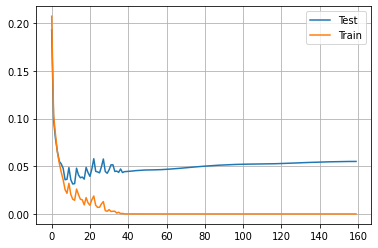

In [14]:
# plt.plot(test_accuracy_history);
plt.plot(test_loss_history, label='Test')
plt.plot(train_loss_history, label='Train')
plt.legend()
plt.grid();

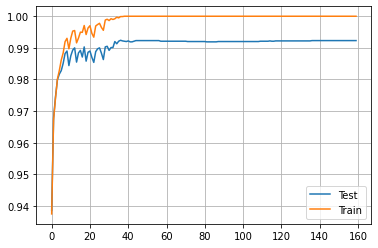

In [15]:
# plt.plot(test_accuracy_history);
plt.plot(test_accuracy_history, label='Test')
plt.plot(train_accuracy_history, label='Train')
plt.legend()
plt.grid();